In [1]:
!pip install networkx


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import networkx as nx

gexf_file = "/work/education_network.gexf"
G = nx.read_gexf(gexf_file)
print(f" - Nodes: {G.number_of_nodes()}")
print(f" - Edges: {G.number_of_edges()}")

edge_weights = [(u, v, d['weight']) for u, v, d in G.edges(data=True)]
edge_weights = sorted(edge_weights, key=lambda x: x[2], reverse=True)
print("\nTop 5 edges by weight:")
for u, v, weight in edge_weights[:5]:
    print(f"{u} -> {v}: {weight}")

 - Nodes: 18492
 - Edges: 134314

Top 5 edges by weight:
Universidade De Sao Paulo -> Universidade De Sao Paulo: 3658.0
Universidade Federal Do Rio Grande -> Universidade Federal Do Rio Grande: 1347.0
Universidade Federal De Minas Gerais -> Universidade Federal De Minas Gerais: 1227.0
Universidade Estadual De Campinas -> Universidade Estadual De Campinas: 1224.0
Universidade Do Porto -> Universidade Do Porto: 977.0


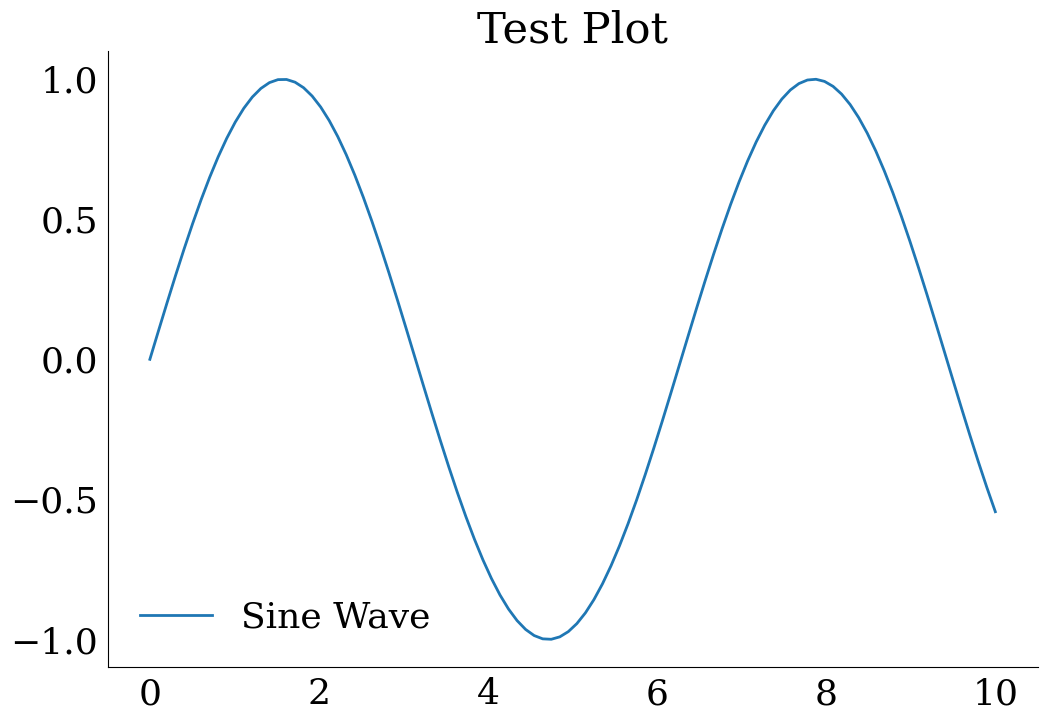

In [71]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.grid': False,
    
    'xtick.top': False,
    'xtick.bottom': False,
    'ytick.left': False,
    'ytick.right': False,
    
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',

    # 'font.family': 'Times New Roman',
    # 'font.weight': 'bold',
    # 'axes.titleweight': 'bold',
    # 'axes.labelweight': 'bold',
    'font.size': 26,
    
    'lines.linewidth': 2,
    
    'figure.figsize': (12, 8)
})

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

import numpy as np
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y, label='Sine Wave')
plt.legend(frameon=False)
plt.title("Test Plot")
plt.show()


Best fit line: slope = -0.78, intercept = -0.43
/tmp/ipykernel_402/2190548317.py:47: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.loglog(centers_total, fit_line, '-', label=eqt, color='red', linestyle='--')


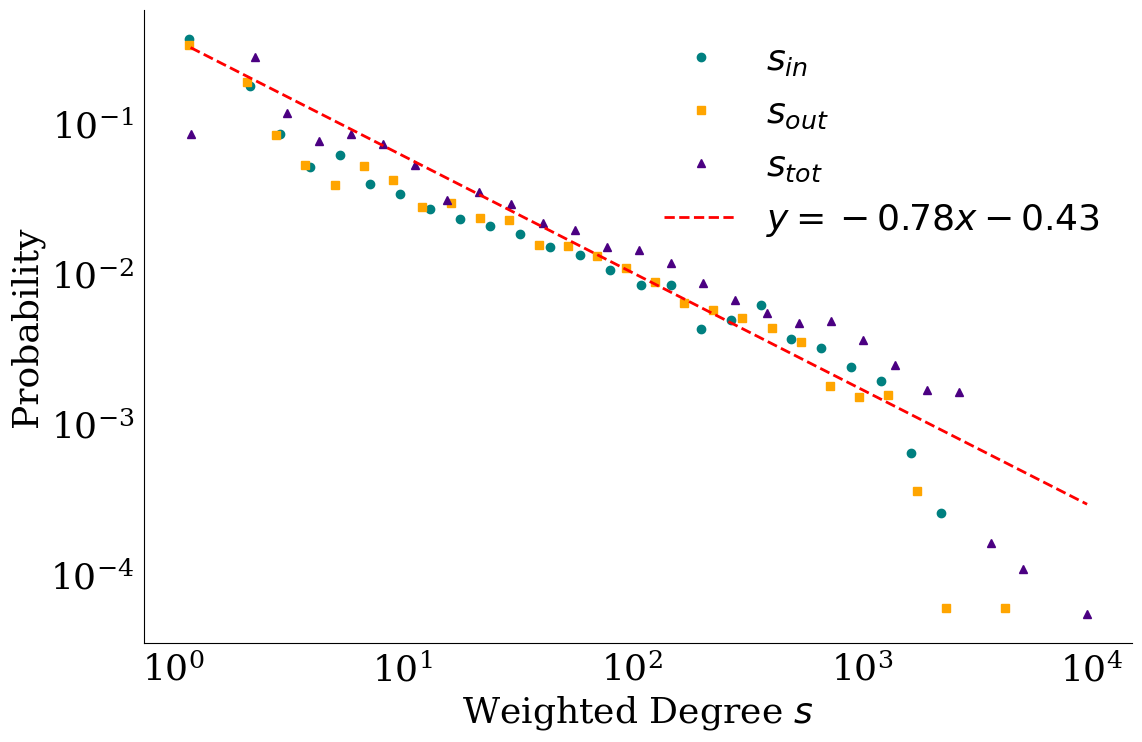

In [73]:
import numpy as np
import matplotlib.pyplot as plt

num_bins = 30

weighted_in = dict(G.in_degree(weight='weight'))
weighted_out = dict(G.out_degree(weight='weight'))
weighted_total = {node: weighted_in.get(node, 0) + weighted_out.get(node, 0) for node in G.nodes()}

in_degs = np.array([d for d in weighted_in.values() if d > 0])
out_degs = np.array([d for d in weighted_out.values() if d > 0])
total_degs = np.array([d for d in weighted_total.values() if d > 0])

bins_in = np.logspace(np.log10(in_degs.min()), np.log10(in_degs.max()), num=num_bins)
bins_out = np.logspace(np.log10(out_degs.min()), np.log10(out_degs.max()), num=num_bins)
bins_total = np.logspace(np.log10(total_degs.min()), np.log10(total_degs.max()), num=num_bins)

hist_in, edges_in = np.histogram(in_degs, bins=bins_in)
hist_out, edges_out = np.histogram(out_degs, bins=bins_out)
hist_total, edges_total = np.histogram(total_degs, bins=bins_total)

prob_in = hist_in / float(np.sum(hist_in))
prob_out = hist_out / float(np.sum(hist_out))
prob_total = hist_total / float(np.sum(hist_total))

centers_in = (edges_in[:-1] + edges_in[1:]) / 2
centers_out = (edges_out[:-1] + edges_out[1:]) / 2
centers_total = (edges_total[:-1] + edges_total[1:]) / 2

mask = prob_total > 0
filtered_centers = centers_total[mask]
filtered_probs = prob_total[mask]

log_centers_total = np.log10(filtered_centers)
log_prob_total = np.log10(filtered_probs)

slope, intercept = np.polyfit(log_centers_total, log_prob_total, 1)
print(f"Best fit line: slope = {slope:.2f}, intercept = {intercept:.2f}")

fit_line = 10**(slope * np.log10(centers_total) + intercept)

eqt = f"$y = {slope:.2f}x {intercept:.2f}$"

plt.loglog(centers_in, prob_in, 'o', label='$s_{in}$', color="#008080")
plt.loglog(centers_out, prob_out, 's', label='$s_{out}$', color="orange")
plt.loglog(centers_total, prob_total, '^', label='$s_{tot}$', color="#4B0082")
plt.loglog(centers_total, fit_line, '-', label=eqt, color='red', linestyle='--')

plt.xlabel("Weighted Degree $s$")
plt.ylabel("Probability")
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig("degree.png", dpi=300, transparent=True)
plt.show()


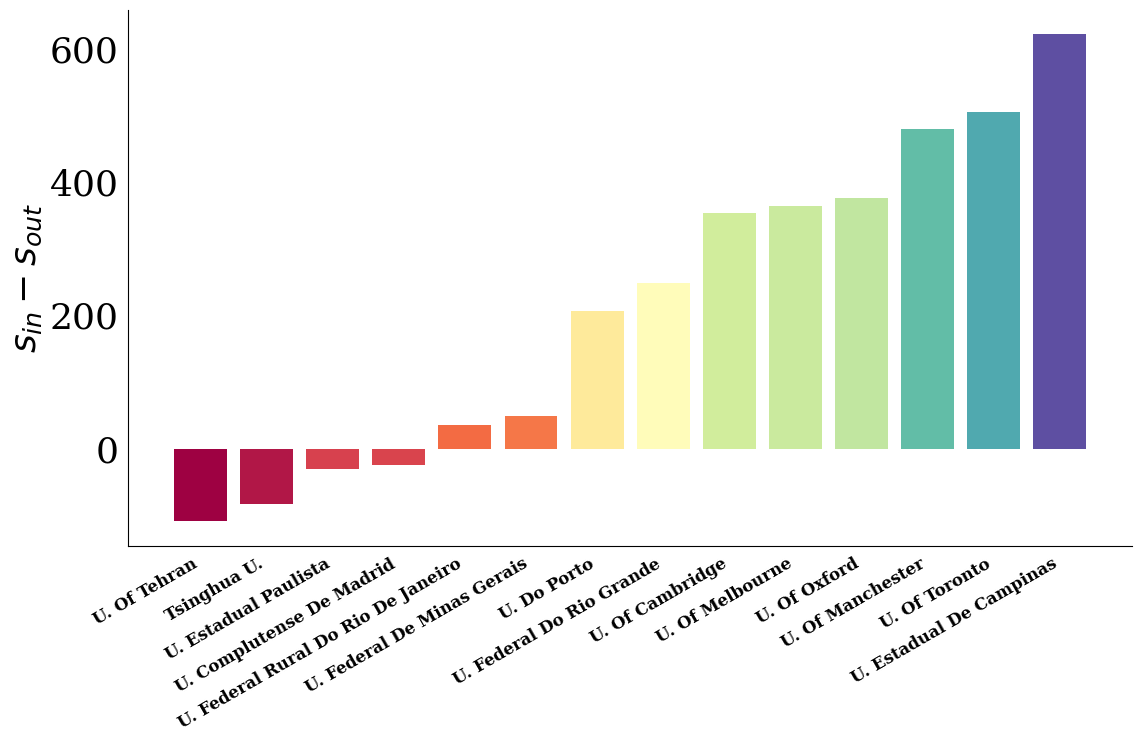

In [79]:
weighted_in = dict(G.in_degree(weight='weight'))
weighted_out = dict(G.out_degree(weight='weight'))

diffs = {node: weighted_in.get(node, 0) - weighted_out.get(node, 0) for node in G.nodes()}
total = {node: weighted_out.get(node, 0) + weighted_in.get(node, 0) for node in G.nodes()}

sorted_by_total = sorted(total.items(), key=lambda x: x[1], reverse=True)
top_10 = sorted_by_total[1:15]

top_10_diffs = {node: diffs[node] for node, _ in top_10}

sorted_top = sorted(top_10_diffs.items(), key=lambda x: x[1])
nodes = [node for node, diff in sorted_top]
vals = [diff for node, diff in sorted_top]

nodes = [x.replace('University', 'U.') for x in nodes]
nodes = [x.replace('Universidade', 'U.') for x in nodes]
nodes = [x.replace('Universidad', 'U.') for x in nodes]

min_diff = min(vals)
max_diff = max(vals)
normalized = [(d - min_diff) / (max_diff - min_diff) if max_diff != min_diff else 0.5 for d in vals]
colors = [plt.get_cmap('Spectral')(norm) for norm in normalized]

plt.figure()
plt.bar(nodes, vals, color=colors)
plt.ylabel("$s_{in} - s_{out}$")
# plt.title("Weighted Degree Differentials for Highest Degree Universities", fontsize=16, fontweight="bold")
plt.xticks(rotation=30, ha='right',fontsize=12, fontweight="bold")
# plt.yticks()
plt.tight_layout()
plt.savefig("diff.png", dpi=300, transparent=True)


In [9]:
import random

def generate_null_ensemble(G, n_null=10):
    null_graphs = []
    
    out_strength = dict(G.out_degree(weight='weight'))
    in_strength = dict(G.in_degree(weight='weight'))
    
    out_stubs = [node for node, w in out_strength.items() for _ in range(int(w))]
    in_stubs = [node for node, w in in_strength.items() for _ in range(int(w))]
    
    if len(out_stubs) != len(in_stubs):
        raise ValueError("Mismatch in total out- and in-strength stubs. Check weight scaling.")
    
    for i in range(n_null):
        in_stubs_copy = in_stubs.copy()
        random.shuffle(in_stubs_copy)
        
        edge_weights = {}
        for u, v in zip(out_stubs, in_stubs_copy):
            edge_weights[(u, v)] = edge_weights.get((u, v), 0) + 1
        
        G_null = nx.DiGraph()
        G_null.add_nodes_from(G.nodes(data=True))
        for (u, v), weight in edge_weights.items():
            G_null.add_edge(u, v, weight=weight)
        
        null_graphs.append(G_null)
    
    return null_graphs

null_ensemble = generate_null_ensemble(G, n_null=10)
print(f"Generated {len(null_ensemble)} null graphs.")

Generated 10 null graphs.


In [11]:
import numpy as np

In [23]:
def compute_weighted_rich_club(G, k_threshold):
    G_und = G.to_undirected()
    degree_dict = dict(G_und.degree())
    rich_nodes = {node for node, deg in degree_dict.items() if deg > k_threshold}
    
    if len(rich_nodes) < 2 or G_und.subgraph(rich_nodes).number_of_edges() == 0:
        return 0
    
    subgraph = G_und.subgraph(rich_nodes)
    total_weight = sum(d.get('weight', 1.0) for _, _, d in subgraph.edges(data=True))
    num_edges = subgraph.number_of_edges()
    return total_weight / num_edges

def compute_rich_club_curve(G, k_values):
    phi_values = [compute_weighted_rich_club(G, k) for k in k_values]
    return np.array(phi_values)

G_und = G.to_undirected()
k_values = np.linspace(0, 400, 10)

phi_empirical = compute_rich_club_curve(G, k_values)

In [24]:
phi_null_all = []
for nullG in null_ensemble[:3]:
    phi_null = compute_rich_club_curve(nullG, k_values)
    phi_null_all.append(phi_null)
phi_null_all = np.array(phi_null_all)

phi_null_mean = np.mean(phi_null_all, axis=0)
phi_null_std  = np.std(phi_null_all, axis=0)

print(phi_null_mean)
print(phi_null_std)

[1.17112516 1.26598588 1.33122341 1.39914406 1.46958658 1.54152659
 1.6127222  1.68216105 1.77322917 1.84722304]
[0.00047614 0.00117554 0.00179508 0.00246458 0.0038695  0.00331352
 0.00423936 0.0039732  0.00403672 0.00188695]


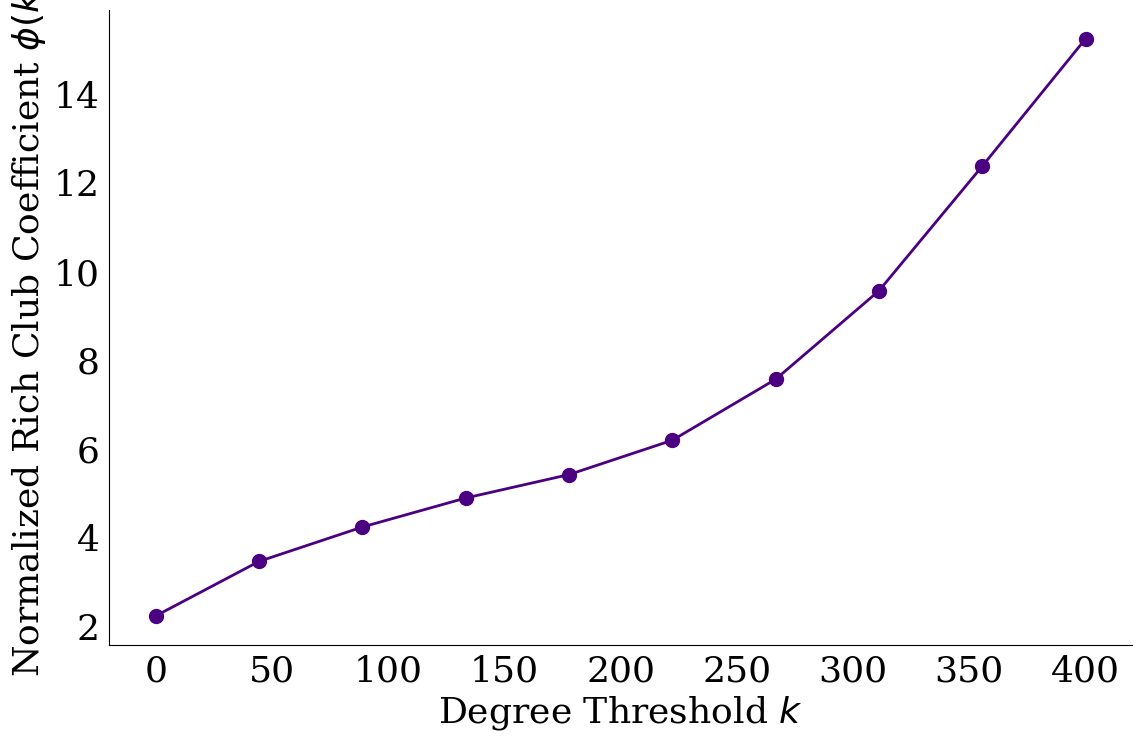

In [85]:
phi_normalized = phi_empirical / np.where(phi_null_mean == 0, np.nan, phi_null_mean)

# plt.figure(figsize=(10, 6))
# plt.errorbar(k_values, phi_null_mean, yerr=phi_null_std, fmt='o-', label='Null Ensemble Mean', color="#008080")
# plt.plot(k_values, phi_empirical, 's-', label='Empirical')
plt.plot(k_values, phi_normalized, "o-", linewidth=2, markersize=10, label='Normalized Rich Coefficient', color="#4B0082")
# plt.ylim([0, 10])
plt.xlabel("Degree Threshold $k$")
plt.ylabel("Normalized Rich Club Coefficient $\phi(k)$")
# plt.title("Norm. Rich Club Coefficient", fontsize=16, fontweight='bold')
# plt.legend()
plt.tight_layout()
plt.savefig("rich_club.png", dpi=300)

In [19]:
import statistics
import random
from tqdm import tqdm

def weighted_clustering(G):
    return nx.average_clustering(G.to_undirected(), weight='weight')

def sampled_weighted_path_length(G, sample_size=100):
    nodes = list(G.nodes())
    if sample_size > len(nodes):
        sample_size = len(nodes)
    sample_nodes = random.sample(nodes, sample_size)
    
    G_inv = G.copy()
    for u, v, d in G_inv.edges(data=True):
        d['inv_weight'] = 1 / d['weight'] if d['weight'] > 0 else 1e6
    
    path_lengths = []
    for source in sample_nodes:
        try:
            lengths = nx.single_source_dijkstra_path_length(G_inv, source, weight='inv_weight')
            lengths.pop(source, None)
            path_lengths.extend(lengths.values())
        except Exception as e:
            continue
    
    return statistics.mean(path_lengths) if path_lengths else float('inf')

print("Computing empirical clustering...")

empirical_clustering = weighted_clustering(G)

print("Computing empirical path length...")

empirical_path_length = sampled_weighted_path_length(G)

null_clustering_vals = []
null_path_length_vals = []

for null_G in tqdm(null_ensemble, desc="Computing null metrics"):
    null_clustering_vals.append(weighted_clustering(null_G))
    null_path_length_vals.append(sampled_weighted_path_length(null_G))

print("\nSummary Statistics (Truncated Graph)")
print(f"Empirical Clustering:       {empirical_clustering:.4f}")
print(f"Null Clustering Mean ± Std: {np.mean(null_clustering_vals):.4f} ± {np.std(null_clustering_vals):.4f}")
print(f"\nEmpirical Path Length:       {empirical_path_length:.4f}")
print(f"Null Path Length Mean ± Std: {np.mean(null_path_length_vals):.4f} ± {np.std(null_path_length_vals):.4f}")

Computing empirical clustering...
Computing empirical path length...
Computing null metrics...
Computing null metrics: 100%|██████████| 10/10 [12:45<00:00, 76.58s/it]
Summary Statistics (Truncated Graph)
Empirical Clustering:       0.0001
Null Clustering Mean ± Std: 0.0053 ± 0.0005

Empirical Path Length:       2.7853
Null Path Length Mean ± Std: 2.2327 ± 0.0300



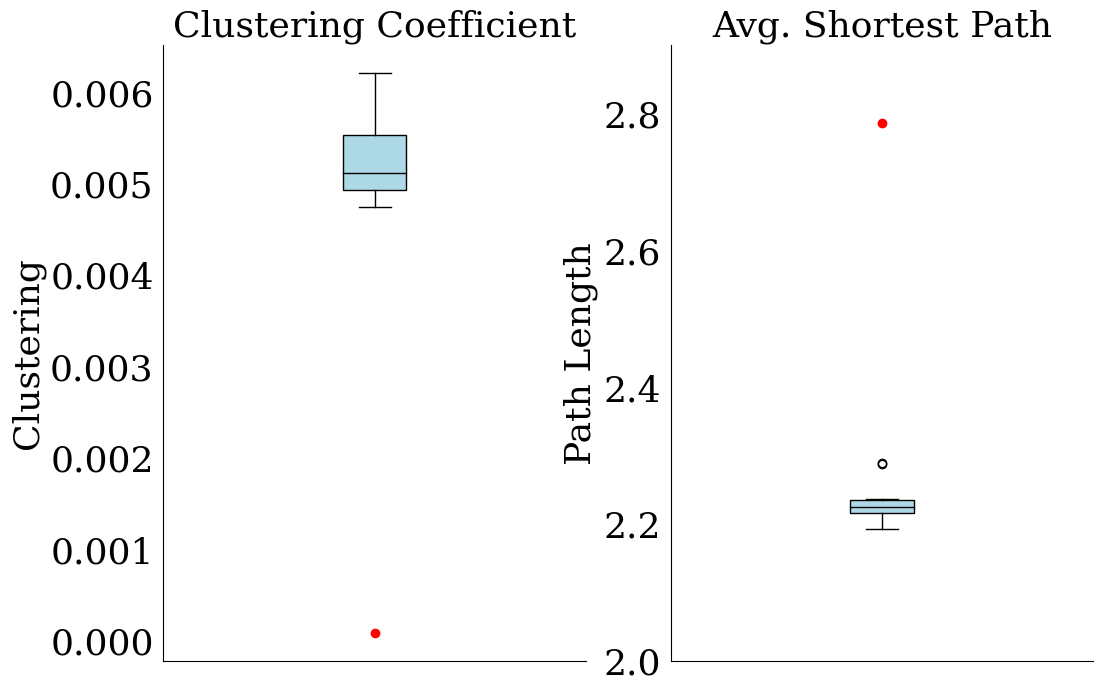

In [116]:
# plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(null_clustering_vals, patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='black'))
plt.scatter(1, empirical_clustering, color='red', zorder=5, label='Empirical')
plt.title("Clustering Coefficient", fontsize=26)
plt.ylabel("Clustering")
plt.xticks([])
# plt.legend(frameon=False, fontsize=18)

# plt.tight_layout()

plt.subplot(1, 2, 2)
plt.boxplot(null_path_length_vals, patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='black'))
plt.scatter(1, empirical_path_length, color='red', zorder=5, label='Empirical')
plt.title("Avg. Shortest Path", fontsize=26)
plt.ylabel("Path Length")
plt.ylim([2, 2.9])
plt.xticks([])
# plt.legend(frameon=False, fontsize=18)

# plt.tight_layout()

plt.savefig("small_world_metrics_boxplots.png", dpi=300)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5e0b0b5b-dc28-4fcb-9294-5f77e7a1bd25' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>